<a href="https://colab.research.google.com/github/enilaester/Bootcamp-Data-Analytics-Resilia/blob/main/ToDo8_Exploratory_Analysis_Employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória - Funcionários da Companhia Milsa

# **Importando a tabela**

In [ ]:
#Importando a biblioteca Pandas e Matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#A base de dados está disponível online: http://www.leg.ufpr.br/~fernandomayer/data/milsa.csv

#Importando os dados com a coluna "Funcionário" como índex explícito:
milsa_df = pd.read_csv("http://www.leg.ufpr.br/~fernandomayer/data/milsa.csv", index_col="Funcionario")

# **Visualizando os dados**

In [ ]:
#Visualizando as 5 primeiras linhas da tabela:
milsa_df.head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro


In [ ]:
#Visualizando as 5 últimas linhas da tabela:
milsa_df.tail()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
32,casado,2o Grau,1.0,16.61,36,4,interior
33,casado,Superior,3.0,17.26,43,7,capital
34,solteiro,Superior,NaN,18.75,33,7,capital
35,casado,2o Grau,2.0,19.40,48,11,capital
36,casado,Superior,3.0,23.30,42,2,interior


In [ ]:
#Obtendo uma descrição geral dos dados:
#Número de linhas e colunas
#Tipos de dados
# Se há dados nulos
milsa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Est.civil  36 non-null     object 
 1   Inst       36 non-null     object 
 2   Filhos     20 non-null     float64
 3   Salario    36 non-null     float64
 4   Anos       36 non-null     int64  
 5   Meses      36 non-null     int64  
 6   Regiao     36 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.2+ KB


* Esse dataframe possui 36 linhas e 7 colunas;
* Há um total de 16 dados nulos (36-20) na categoria 'Filhos'. Por isso, não deve-se excluir tais linhas faltantes porque representam em torno de 45% dos dados totais. Será necessário avaliar como preencher tais linhas em uma próxima etapa.

In [ ]:
#Verificando se há valores duplicados no dataframe:
milsa_df.value_counts()

Est.civil  Inst      Filhos  Salario  Anos  Meses  Regiao  
casado     1o Grau   0.0     6.66     28    0      interior    1
                     1.0     4.56     32    10     capital     1
           Superior  3.0     17.26    43    7      capital     1
                     0.0     12.79    26    1      outro       1
           2o Grau   5.0     14.71    40    6      interior    1
                     2.0     19.40    48    11     capital     1
                             15.99    35    10     capital     1
                             13.60    35    0      outro       1
                             13.23    32    5      interior    1
                             8.12     33    6      interior    1
                     1.0     16.61    36    4      interior    1
                             11.06    30    9      outro       1
                             9.77     31    7      capital     1
                             7.59     34    10     capital     1
                     0.0     1

* Observamos que na última coluna foi indicado que a frequência de cada linha é 1, portanto, não temos dados duplicados.

# **Limpando os dados**

1. Retirando a coluna "Meses" porque não será necessária para a análise:

In [ ]:
#Obtendo todas as colunas:
milsa_colunas = set(milsa_df.columns)

#Removendo a coluna 'Meses'
milsa_colunas.remove('Meses')

#Criando um novo dataframe:
milsa_colunas= list(milsa_colunas)
novo_milsa_df = milsa_df[milsa_colunas]

2. Preenchendo os dados nulos da coluna 'Filhos' com o valor zero (0):

In [ ]:
novo_milsa_df.fillna(0, inplace=True)


In [ ]:
#Verificando a quantidade de nulos:
novo_milsa_df.isnull().sum()

Est.civil    0
Filhos       0
Regiao       0
Inst         0
Salario      0
Anos         0
dtype: int64

In [ ]:
novo_milsa_df

,Est.civil,Filhos,Regiao,Inst,Salario,Anos
Funcionario,,,,,,
1,solteiro,0.0,interior,1o Grau,4.00,26
2,casado,1.0,capital,1o Grau,4.56,32
3,casado,2.0,capital,1o Grau,5.25,36
4,solteiro,0.0,outro,2o Grau,5.73,20
5,solteiro,0.0,outro,1o Grau,6.26,40
6,casado,0.0,interior,1o Grau,6.66,28
7,solteiro,0.0,interior,1o Grau,6.86,41
8,solteiro,0.0,capital,1o Grau,7.39,43
9,casado,1.0,capital,2o Grau,7.59,34


# **Análise de Outliers**

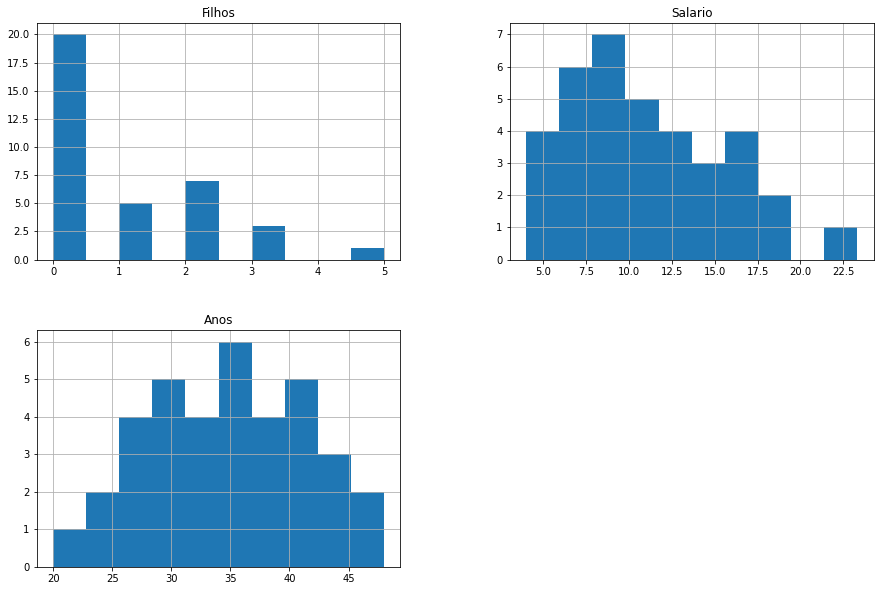

In [ ]:
#Criação dos histogramas para variáveis quantitativas:
novo_milsa_df.hist(bins = 10, figsize=(15,10));

Através dos histogramas, pode-se observar que:

*   Para a variável 'Filhos', o valor '5' apresenta apenas uma ocorrência o que pode indicar que seja um outlier, porém tal informação deve ser confirmada nas etapas seguintes;
*   Para a variável 'Salario', o valor de 22,5 também apresenta apenas uma ocorrência e está relativamente distante da maioria dos dados que estão concentrados próximos de 10. Por isso, pode ser que seja um outlier.

* Para a variável 'Anos', que representa a idade dos funcionários, só temos uma observação com o valor '20', sendo que a média se encontra em torno de 35 anos. É necessário seguir com as etapas para de fato concluir se o dado é um outlier.



In [ ]:
#Utilizando o método describe para ver as principais estatísticas descritivas:
novo_milsa_df.describe()

,Filhos,Salario,Anos
count,20.000000,36.000000,36.000000
mean,1.650000,11.122222,34.583333
std,1.268028,4.587458,6.737422
min,0.000000,4.000000,20.000000
25%,1.000000,7.552500,30.000000
50%,2.000000,10.165000,34.500000
75%,2.000000,14.060000,40.000000
max,5.000000,23.300000,48.000000


*   Para a variável 'Filhos', percebemos que até 75% dos funcionários tem até 2 filhos, o que pode ser uma evidência de que o valor 5 é de fato um outlier.
*  Para a variável 'Salario', vemos que até 75% dos funcinonários ganha até 14, mas o valor máximo é de fato 23,3. Entretando será necessário o uso do boxplot para confirmar se configura como outlier ou não.
* Com relação à variável 'Anos', podemos confirmar apenas que 20 é o menor valor encontrado.



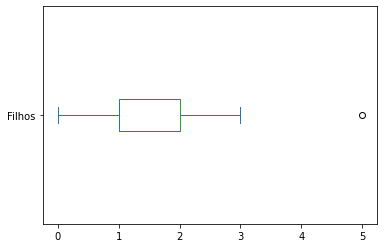

In [ ]:
# Boxplot para a variável 'Filhos'
bp1 = pd.DataFrame(novo_milsa_df, columns =['Filhos'])
bp1.plot.box(vert=False);

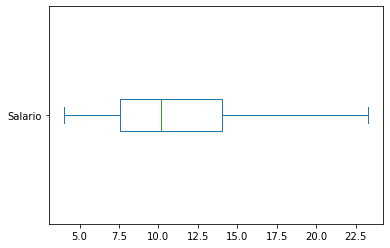

In [ ]:
# Boxplor para a variável 'Salario'
bp2 = pd.DataFrame(novo_milsa_df, columns =['Salario'])
bp2.plot.box(vert=False);

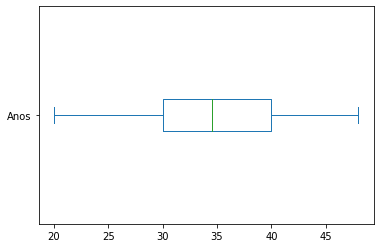

In [ ]:
#Boxplot para a variável 'Anos'
bp3 = pd.DataFrame(novo_milsa_df, columns =['Anos'])
bp3.plot.box(vert=False);

Podemos confirmar assim, que nesse dataset há apenas um outlier referente à variável 'Filhos'. Porém, como o dataset é muito pequeno, o outlier será mantido.

# **Análise Exploratória**

### **1. Qual a média de idade dos funcionários?**

In [ ]:
idade_media = novo_milsa_df['Anos'].mean()
idade_media

34.583333333333336

A média de idade de todos os funcionários da companhia é de 35 anos.

### **2. Dos funcionários que têm filhos, qual o número mais comum?**

In [ ]:
filtro = novo_milsa_df[novo_milsa_df['Filhos'] > 0]
filtro['Filhos'].mode()

0    2.0
dtype: float64

Considerando apenas os funcionários que tem filhos, a quantidade mais comum é de 2 filhos por funcionário.

### **3. Qual a média e a mediana dos salários dos funcionários? O que esses valores podem indicar?**

In [ ]:
novo_milsa_df.describe()

,Filhos,Anos,Salario
count,20.000000,36.000000,36.000000
mean,1.650000,34.583333,11.122222
std,1.268028,6.737422,4.587458
min,0.000000,20.000000,4.000000
25%,1.000000,30.000000,7.552500
50%,2.000000,34.500000,10.165000
75%,2.000000,40.000000,14.060000
max,5.000000,48.000000,23.300000


* A média dos salários é 11,12, um valor muito próximo da mediana que é 10,17.
*  Porém, percebemos que o desvio padrão é significativo, em torno de 4.58, o que indica uma certa variabilidade nos dados, isto é, há salários muito menores ou maiores do que a média/mediana encontrada.
* Mas considernado que até 75% dos salários é de no máximo 14,06,a média/mediana são boas medidas descritivas desse conjunto de dados.


### **4. Quais são os tipos de instrução existente?**

In [ ]:
#Verificando a quantidade de níveis de instrução:
print('Há no total',novo_milsa_df['Inst'].nunique(),'tipos de escolaridade entre os funcionários.')

Há no total 3 tipos de escolaridade entre os funcionários.


In [ ]:
#Verificando quais são os tipos de instrução existentes
novo_milsa_df.Inst.unique()

array(['1o Grau', '2o Grau', 'Superior'], dtype=object)

Neste dataset o grau de instrução é classificado em 1º Grau, 2º Grau(Ensino Médio) e Superior.

### **(EXTRA) De acordo com o nível de instrução, qual o salário máximo, mínimo e médio encontrados?**

In [ ]:
novo_milsa_df.groupby('Inst')[['Salario']].mean()

,Salario
Inst,
1o Grau,7.836667
2o Grau,11.528333
Superior,16.475000


In [ ]:
novo_milsa_df.groupby('Inst')[['Salario']].max()

,Salario
Inst,
1o Grau,13.85
2o Grau,19.40
Superior,23.30


In [ ]:
novo_milsa_df.groupby('Inst')[['Salario']].min()

,Salario
Inst,
1o Grau,4.00
2o Grau,5.73
Superior,10.53


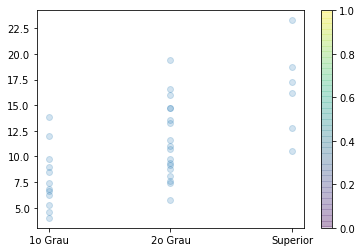

In [ ]:
#Gráfico de dispersão:

x = novo_milsa_df['Inst']
y = novo_milsa_df['Salario']
#colors =
#sizes

plt.scatter(x, y, alpha=0.2)
plt.colorbar();

* Podemos confirmar que os maiores salários da companhia estão alocados para funcionários com nível superior.
* Há algumas exceções, por exemplo, um funcionário de nível médio com salário igual a 19,4, o que pode indicar que tal funcionário pode possuir muitos anos de experiência.
* Através da média, podemos afirmar que a maioria dos funcionários com ensino básico possuem salário abaixo de 10; com ensino médio possuem salário um pouco acima de 11 e com ensino superior acima de 16.

### **(EXTRA) Qual a variabilidade encontrada no banco de dados nas categorias de salário e idade?**

In [ ]:
#Cálculo do coeficiente de variação para salário
desvio_salario = novo_milsa_df['Salario'].std()
media_salario = novo_milsa_df['Salario'].mean()
coeficiente_salario = desvio_salario / media_salario *100

coeficiente_salario

41.24587166257218

In [ ]:
#Cálculo do coeficiente de variáção para a idade(anos)
desvio_idade = novo_milsa_df['Anos'].std()
media_idade = novo_milsa_df['Anos'].mean()
coeficiente_idade = desvio_idade/media_idade *100
coeficiente_idade

19.48170258428677


*   Há uma grande variabilidade nos dados relacionados ao salário dos funcionários, uma vez que o coeficiente de variação é igual a 41,2 % o que indica que é um grupo de dados heterogêneo, isto é, os dados estão mais dispersos em torno da média.
* Por outro lado, com um coeficiente de 19%, nos mostra que há variação na idade dos funcionários, porém ela é bem menor comparada à dos salários, indicando que a idade dos funcionários está no geral, próxima da média.



### **5. Qual a média de salário e idade das pessoas casadas?**

In [ ]:
func_casados = novo_milsa_df[novo_milsa_df['Est.civil'] == 'casado'][['Anos','Salario']].mean()
func_casados


Anos       35.1500
Salario    12.1235
dtype: float64

Os funcionários casados tem em média 35 anos e um salário de 12,1.

### **6. Qual o funcionário que possui maior salário (informe seus atributos)?**

In [ ]:
#1. Buscando a coluna de Salario
sal = novo_milsa_df["Salario"]
#2. Atribuindo a uma variável o maior salário
sal_maior = sal.max()
#3. Filtrando a coluna Salario para retornar o funcionario com o maior valor:
func_maior_salario = novo_milsa_df[novo_milsa_df['Salario'] == sal_maior ]
func_maior_salario

,Est.civil,Filhos,Regiao,Inst,Salario,Anos
Funcionario,,,,,,
36,casado,3.0,interior,Superior,23.3,42


O/A funcionário(a) de 42 anos, casado(a), morador(a) do interior, responsável por 3 filhos e com nível superior possui o maior salário da companhia.

### **7. Qual o funcionário que possui menor idade (informe seus atributos)?**

In [ ]:
# Buscando a coluna 'Anos'
idade = novo_milsa_df["Anos"]
#. Atribuindo a uma variável a menor idade
idade_menor = idade.min()
#Filtrando a coluna Anos para identificar quem é o funcionário:
func_menor_idade = novo_milsa_df[novo_milsa_df['Anos'] == idade_menor]
func_menor_idade


,Est.civil,Filhos,Regiao,Anos,Inst,Salario
Funcionario,,,,,,
4,solteiro,NaN,outro,20,2o Grau,5.73


O funcionário mais jovem da companhia, com 20 anos, não reside na capital ou interior, é solteiro(a), não possui filhos, é formado(a) no Ensino Médio e recebe um salário de 5.73.

### **8. Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?**

In [ ]:
#Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?

func_criterios = novo_milsa_df[
  (novo_milsa_df['Anos'] <= 35)
 & (novo_milsa_df['Regiao'] == "capital")
 & (novo_milsa_df['Inst'] == "2o Grau")
]
func_criterios


,Est.civil,Filhos,Regiao,Inst,Salario,Anos
Funcionario,,,,,,
9,casado,1.0,capital,2o Grau,7.59,34
17,casado,1.0,capital,2o Grau,9.77,31
22,solteiro,0.0,capital,2o Grau,11.59,34
30,casado,2.0,capital,2o Grau,15.99,35


In [ ]:
func_criterios['Anos'].mean()

33.5

In [ ]:
func_criterios['Salario'].mean()

11.235

In [ ]:
func_criterios['Filhos'].mean()

1.0

Há 4 funcionários que atendem essa característica, tendo em média 34 anos, 1 filho e um salário de 11,2.

### **(EXTRA) Onde estão localizados os funcionários que tem instrução superior?**

In [ ]:
novo_milsa_df.groupby(['Regiao','Inst'])[['Inst']].count()

Inst
Regiao   Inst          
capital  1o Grau      4
         2o Grau      5
         Superior     2
interior 1o Grau      3
         2o Grau      7
         Superior     2
outro    1o Grau      5
         2o Grau      6
         Superior     2

Percebe-se que há uma distribuição igualitária de funcionários com nível superior em relação à localização: há 2 funcionários na capital, no interior e na categoria 'outro' que cursaram universidade.

### **9. Faça uma correlação entre todos os atributos**

In [ ]:
#1 Realizando uma cópia do dataframe:
copia = novo_milsa_df.copy()
copia

,Est.civil,Filhos,Regiao,Inst,Salario,Anos
Funcionario,,,,,,
1,solteiro,0.0,interior,1o Grau,4.00,26
2,casado,1.0,capital,1o Grau,4.56,32
3,casado,2.0,capital,1o Grau,5.25,36
4,solteiro,0.0,outro,2o Grau,5.73,20
5,solteiro,0.0,outro,1o Grau,6.26,40
6,casado,0.0,interior,1o Grau,6.66,28
7,solteiro,0.0,interior,1o Grau,6.86,41
8,solteiro,0.0,capital,1o Grau,7.39,43
9,casado,1.0,capital,2o Grau,7.59,34


In [ ]:
#Colocando valores numéricos para a coluna de estado civil:
new_civil = {'solteiro': 1, 'casado': 2}
copia['Est.civil'] = copia['Est.civil'].map(new_civil)

#Colocando valores numéricos para a coluna de instrução:
new_inst = {'1o Grau': 1, '2o Grau': 2, 'Superior': 3}
copia['Inst'] = copia['Inst'].map(new_inst)

#Colocando valores numéricos para a coluna de região:
new_regiao = {'interior': 1, 'capital': 2, 'outro': 3}
copia['Regiao'] = copia['Regiao'].map(new_regiao)


copia

,Est.civil,Filhos,Regiao,Inst,Salario,Anos
Funcionario,,,,,,
1,1,0.0,1,1,4.00,26
2,2,1.0,2,1,4.56,32
3,2,2.0,2,1,5.25,36
4,1,0.0,3,2,5.73,20
5,1,0.0,3,1,6.26,40
6,2,0.0,1,1,6.66,28
7,1,0.0,1,1,6.86,41
8,1,0.0,2,1,7.39,43
9,2,1.0,2,2,7.59,34


In [ ]:
#Correlação entre todos os atributos:

corr = copia[['Est.civil', 'Filhos', 'Inst', 'Regiao', 'Salario', 'Anos']].corr()
corr


,Est.civil,Filhos,Inst,Regiao,Salario,Anos
Est.civil,1.000000,0.664838,0.108465,-0.238647,0.247488,0.095369
Filhos,0.664838,1.000000,0.114723,-0.160013,0.375551,0.422981
Inst,0.108465,0.114723,1.000000,-0.088979,0.639350,-0.216011
Regiao,-0.238647,-0.160013,-0.088979,1.000000,-0.102727,0.082419
Salario,0.247488,0.375551,0.639350,-0.102727,1.000000,0.363362
Anos,0.095369,0.422981,-0.216011,0.082419,0.363362,1.000000


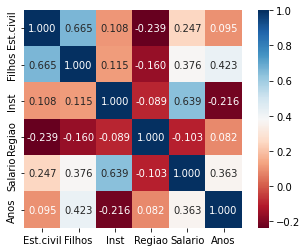

In [ ]:
# Gráfico de calor (heatmap)
sns.heatmap(corr, cmap='RdBu', fmt= '.3f', square=True, linecolor='white', annot=True);

Há correlações significativas entre as seguintes variáveis:
* Encontra-se uma correlação forte (0,67) entre o estado civil e a quantidade de filhos dos funcionários, o que é esperado;
*  Conforme já explicitado, há uma correlação forte (0,64) entre o nível de instrução e o salário dos funcionários;
*  Há uma correlação moderada (0,42) entre a quantidade de filhos e a idade dos funcionários;
*  Há uma correlação moderada (0,4) entre o salário dos funcionários e a sua idade e número de filhos.


